In [1]:
import pandas as pd
import numpy as np
from glob import glob
from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 99)
import EDA
import utils
#sorted(glob('../data/*'))

In [2]:
df = utils.read_pickles('../data/POS_CASH_balance').sort_values(['SK_ID_CURR', 'MONTHS_BALANCE'], ascending=[True, False])
df.head()

100%|██████████| 20/20 [00:07<00:00,  2.70it/s]


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0


In [3]:
train = utils.load_train()
df['train'] = 0
df.loc[df['SK_ID_CURR'].isin(train.SK_ID_CURR), 'train'] = 1
df_test = df[df['train']==0]
df_train = df[df['train']==1]

100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


In [4]:
EDA.df_info(df_train)

Shape: (8543375, 9)


,DataType,#Nulls,#Uniques,Min,Mean,Max,Std,top10 val,top10 cnt
SK_ID_PREV,int64,0,800337,1000001.0,1.903489e+06,2843499.0,535938.725528,"[2162632, 1865399, 1186496, 2761490, 1190666, ...","[96, 96, 96, 96, 96, 96, 96, 96, 96, 96]"
SK_ID_CURR,int64,0,289444,100002.0,2.784832e+05,456255.0,102708.673222,"[265042, 309133, 127659, 197583, 185185, 20304...","[295, 246, 245, 245, 245, 244, 237, 235, 234, ..."
MONTHS_BALANCE,int64,0,96,-96.0,-3.494812e+01,-1.0,26.053718,"[-10, -9, -11, -8, -12, -7, -13, -6, -14, -15]","[186735, 186189, 186017, 185268, 184595, 18161..."
CNT_INSTALMENT,float64,21863,72,1.0,1.703348e+01,84.0,12.004305,"[12.0, 24.0, 10.0, 6.0, 18.0, 36.0, 8.0, 48.0,...","[2129879, 1281635, 1081012, 912524, 614578, 49..."
CNT_INSTALMENT_FUTURE,float64,21878,78,0.0,1.046808e+01,84.0,11.144076,"[0.0, 4.0, 6.0, 5.0, 3.0, 2.0, 1.0, 10.0, 8.0,...","[1021934, 525573, 524893, 513463, 499025, 4699..."
NAME_CONTRACT_STATUS,object,0,9,NaN,NaN,NaN,NaN,"['Active', 'Completed', 'Signed', 'Demand', 'R...","[7818577, 634872, 74625, 6110, 4591, 4221, 365..."
SK_DPD,int64,0,3358,0.0,1.190473e+01,4231.0,134.030213,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[8284268, 18846, 15005, 12539, 10756, 9649, 84..."
SK_DPD_DEF,int64,0,1987,0.0,5.835209e-01,3373.0,30.421100,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[8444265, 19080, 12710, 10134, 8285, 6991, 583..."
train,int64,0,1,1.0,1.000000e+00,1.0,0.000000,[1],[8543375]


In [5]:
EDA.df_info(df_test)

Shape: (1457983, 9)


,DataType,#Nulls,#Uniques,Min,Mean,Max,Std,top10 val,top10 cnt
SK_ID_PREV,int64,0,135988,1000002.0,1.901623e+06,2843487.0,535303.381485,"[2835402, 1057553, 1364606, 2696917, 1989782, ...","[96, 96, 96, 96, 96, 96, 96, 96, 96, 96]"
SK_ID_CURR,int64,0,47808,100001.0,2.779391e+05,456250.0,103084.668568,"[172612, 362661, 122102, 174805, 450672, 11924...","[247, 239, 232, 227, 227, 227, 226, 224, 221, ..."
MONTHS_BALANCE,int64,0,96,-96.0,-3.539035e+01,-1.0,26.138564,"[-14, -12, -15, -11, -17, -13, -10, -16, -18, -9]","[30131, 30121, 30103, 30006, 29798, 29771, 297..."
CNT_INSTALMENT,float64,4208,65,1.0,1.741890e+01,92.0,11.935387,"[12.0, 24.0, 10.0, 6.0, 18.0, 36.0, 8.0, 48.0,...","[366966, 235837, 162437, 152976, 112816, 93283..."
CNT_INSTALMENT_FUTURE,float64,4209,74,0.0,1.057620e+01,85.0,10.901077,"[0.0, 6.0, 4.0, 5.0, 3.0, 2.0, 10.0, 1.0, 8.0,...","[164026, 89165, 88059, 86832, 82982, 77275, 71..."
NAME_CONTRACT_STATUS,object,0,8,NaN,NaN,NaN,NaN,"['Active', 'Completed', 'Signed', 'Demand', 'R...","[1332542, 110011, 12635, 955, 870, 696, 271, 3]"
SK_DPD,int64,0,2841,0.0,9.861880e+00,4108.0,124.708574,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[1421863, 3026, 2353, 1864, 1594, 1397, 1142, ..."
SK_DPD_DEF,int64,0,903,0.0,1.070201e+00,3595.0,44.046021,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[1443124, 3054, 1980, 1518, 1243, 1040, 796, 7..."
train,int64,0,1,0.0,0.000000e+00,0.0,0.000000,[0],[1457983]


In [8]:
obj_features = [c for c in df.columns if df[c].dtype=='O']

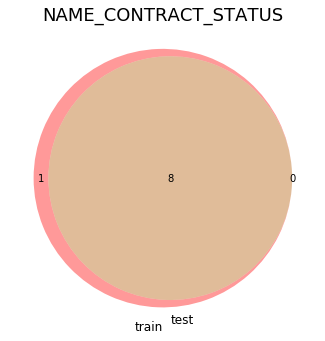

In [9]:
col = list(EDA.split_seq(obj_features, 6))
for c in col:
    EDA.venn_diagram(df_train, df_test, c, (12, 7))

In [11]:
df_train.NAME_CONTRACT_STATUS.unique()

array(['Active', 'Completed', 'Returned to the store', 'Signed',
       'Approved', 'Demand', 'Amortized debt', 'Canceled', 'XNA'],
      dtype=object)

In [13]:
df_test.NAME_CONTRACT_STATUS.unique()

array(['Completed', 'Active', 'Signed', 'Returned to the store',
       'Approved', 'Demand', 'Amortized debt', 'Canceled'], dtype=object)

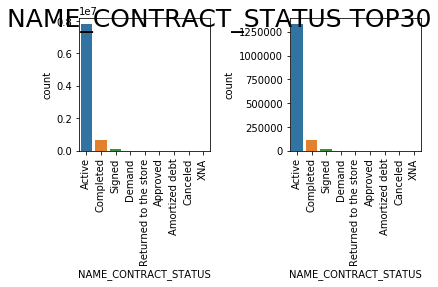

In [12]:
EDA.count_categories(df_train, obj_features, df2=df_test)

In [14]:
df.groupby(['SK_ID_CURR', 'MONTHS_BALANCE']).size().max()

9

In [15]:
df_train.groupby(['SK_ID_CURR', 'MONTHS_BALANCE']).size().max()

7

In [16]:
df_test.groupby(['SK_ID_CURR', 'MONTHS_BALANCE']).size().max()

9

In [3]:
ids = df.SK_ID_CURR.unique()

In [4]:
tmp = df[df.SK_ID_CURR==np.random.choice(ids)]
tmp

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
7735592,1175665,442493,-47,18.0,0.0,Completed,0,0
9048888,1175665,442493,-48,18.0,0.0,Active,0,0
6284754,1175665,442493,-49,18.0,1.0,Active,1,1
6785606,1175665,442493,-50,18.0,2.0,Active,0,0
7163550,1175665,442493,-51,18.0,4.0,Active,0,0
7197272,1175665,442493,-52,18.0,5.0,Active,0,0
772597,1175665,442493,-53,18.0,6.0,Active,0,0
7091152,1175665,442493,-54,18.0,7.0,Active,0,0
5395161,1175665,442493,-55,18.0,8.0,Active,0,0
3062531,1175665,442493,-56,18.0,9.0,Active,0,0
